### <html><div align='center'> CrymeClassifiers Hyperparameter Tuning / Minor Feature Engineering
   </div></html>

In [1]:
from datetime import datetime, timedelta
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from utils import assign_coordinate_to_lon_box, assign_coordinate_to_lat_box, build_risk_map
import numpy as np

In [2]:
ts_start = str(datetime(year=2018, month=4, day=30))
ts_end = str(datetime(year=2019, month=4, day=1))

In [3]:
data = pd.read_csv('/home/ben/.envs/cc/CrymeClarity/crymepipelines/src/tmp/complete_dataset.csv')
data['hour'] = data['time_minutes'].apply(lambda x: round(x/60))
train_ds = data[(data.timestamp > ts_start) & (data.timestamp < ts_end)]
test_ds = data[(data.timestamp > ts_end)]

features = ['longitude', 'latitude', 'time_minutes']

##### Theft  CC

Our three parameters will be max_depth, learning_rate and num_leaves. Lets take the greedy approach to tuning them.

In [ ]:
target = 'n_t'

In [ ]:
tuning = {
    'max_depth': list(range(1,10)),
    'learning_rate': np.linspace(0.001,1.3, 10),
    'num_leaves': list(range(10, 150, 10)),
    'n_estimators': list(range(50,150, 50)),
    'reg_lambda': np.linspace(0,1.5, 10),
}
use_vals = {
    'max_depth': 3, 
    'objective': 'binary', 
    'boosting_type': 'gbdt', 
    'learning_rate': 1.1556666666666666, 
    'num_leaves': 10, 
    'n_estimators': 100, 
    'reg_lambda': 1.3333333333333333
}


final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..', min(lls))
    print(use_vals)
    final.append(min(lls))

In [ ]:
print(final[1], use_vals)

In [ ]:
params = {
    'max_depth': 3, 
    'objective': 'binary', 
    'boosting_type': 'gbdt', 
    'learning_rate': 0.8670000000000001, 
    'num_leaves': 20, 
    'n_estimators': 100, 
    'reg_lambda': 1.3333333333333333
}

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [ ]:
build_risk_map(rfc, 800.0)

#### Burglary CC

In [6]:
target = 'n_b'

In [ ]:
tuning = {
    'max_depth': list(range(1,10)),
    'learning_rate': np.linspace(0.001,1.3, 10),
    'num_leaves': list(range(10, 150, 10)),
    'n_estimators': list(range(50,150, 50)),
    'reg_lambda': np.linspace(0,1.5, 10),
}
use_vals = {
    'max_depth': 2, 
    'objective': 'binary', 
    'boosting_type': 'gbdt', 
    'learning_rate': .001, 
    'num_leaves': 10, 
    'n_estimators': 100, 
    'reg_lambda': 0,
}


final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..', min(lls))
    print(use_vals)
    final.append(min(lls))

In [ ]:
print(final[1], use_vals)

In [7]:
params = {
    'max_depth': 4,
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.2896666666666667,
    'num_leaves': 10,
    'n_estimators': 100,
    'reg_lambda': 0.6666666666666666
}

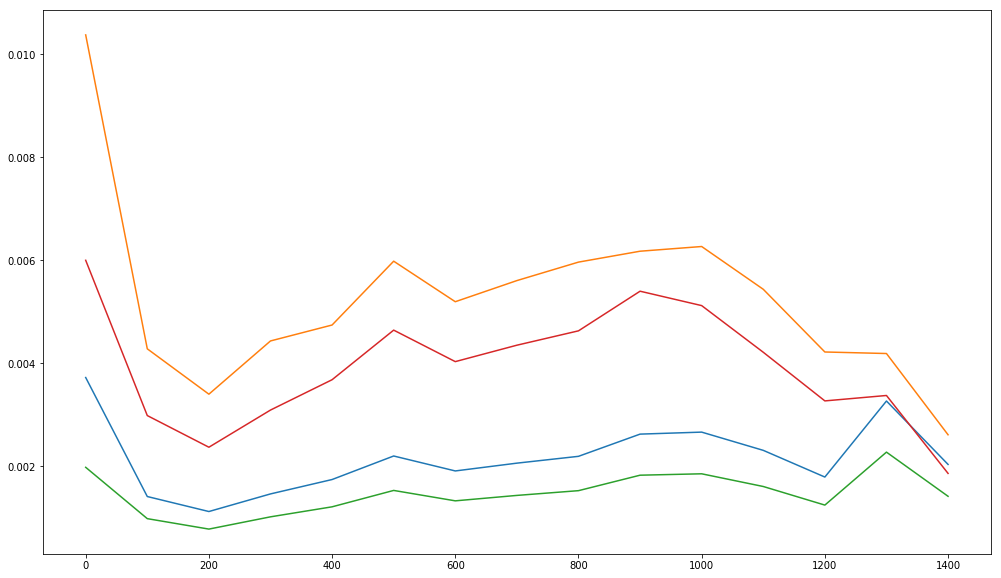

In [8]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [10]:
build_risk_map(rfc, 1.0)

#### Assault / Battery CC

In [11]:
target = 'n_ab'

In [12]:
tuning = {
    'max_depth': list(range(1,10)),
    'learning_rate': np.linspace(0.001,1.3, 10),
    'num_leaves': list(range(10, 150, 10)),
    'n_estimators': list(range(50,150, 50)),
    'reg_lambda': np.linspace(0,1.5, 10),
}
use_vals = {
    'max_depth': 2, 
    'objective': 'binary', 
    'boosting_type': 'gbdt', 
    'learning_rate': .001, 
    'num_leaves': 10, 
    'n_estimators': 100, 
    'reg_lambda': 0
}


final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..', min(lls))
    print(use_vals)
    final.append(min(lls))

{'max_depth': 1, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10, 'n_estimators': 100, 'r

{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.7226666666666667, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.14533333333333334, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.2896666666666667, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.43400000000000005, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.5783333333333334, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt'

{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.5783333333333334, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0.0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.7226666666666667, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0.0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.8670000000000001, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0.0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0113333333333332, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0.0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.1556666666666666, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0.0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.3, 'num_leaves': 10, 'n_estimators': 100, 'reg_lambda': 0.0}
{'max_depth': 2, 'objective': 'binary', 'boosting_type'

In [ ]:
print(final[1], use_vals)

In [ ]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 1.0,
    "num_leaves": 30,
}

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
y_est = rfc.predict_proba(test_ds[features])

log_loss(test_ds[target], y_est)

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [ ]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Life-Threatening Violent Crime CC

In [ ]:
target = 'n_ltvc'

In [ ]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1, 10),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


In [ ]:
print(final[1], use_vals)

In [ ]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.445,
    "num_leaves": 10,
}

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.072979, -118.377806, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [ ]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Shoplifting / Pickpocketing CC

In [ ]:
target = 'n_sp'

In [ ]:
tuning = {
    'max_depth': list(range(1,10)),
    'learning_rate': np.linspace(0.001,1.3, 10),
    'num_leaves': list(range(10, 150, 10)),
    'n_estimators': list(range(50,150, 50)),
    'reg_lambda': np.linspace(.5,1.5, 10),
}
use_vals = {
    'max_depth': 4,
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.7226666666666667,
    'num_leaves': 10,
    'n_estimators': 100, 
    'reg_lambda': 1.0
}

final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..', min(lls))
    print(use_vals)
    final.append(min(lls))


In [ ]:
print(final[1], use_vals)

In [ ]:
params = {
    'max_depth': 4,
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.7226666666666667,
    'num_leaves': 10,
    'n_estimators': 100, 
    'reg_lambda': 1.0
}

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[33.963836, -118.415967, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[33.985631, -118.393561, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [ ]:
build_risk_map(rfc, 800.0)

#### Vehicle/Bike/Boat Stolen CC

In [ ]:
target = 'n_vbbs'

In [ ]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1, 10),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


In [ ]:
print(final[1], use_vals)

In [ ]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 1.0,
    "num_leaves": 160,
}

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [ ]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Property Damage / Threats CC

In [ ]:
target = 'n_pdt'

In [ ]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1.3, 12),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


In [ ]:
print(final[1], use_vals)

In [ ]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.47336,
    "num_leaves": 10,
}

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [ ]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Burglary / Theft From Vehicle CC

In [ ]:
target = 'n_btv'

In [ ]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1.3, 12),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


In [ ]:
print(final[1], use_vals)

In [ ]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.47336363636363643,
    "num_leaves": 10,
}

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [ ]:
data[(data.latitude < -118.554528) & (data.longitude < 34.037846) & (data.n_btv>0)]

In [ ]:
grid[500][135]

In [ ]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Misc. Infrequent Offenses CC

In [ ]:
target = 'n_mio'

In [ ]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1.3, 12),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


In [ ]:
print(final[1], use_vals)

In [ ]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.355273,
    "num_leaves": 10,
}

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [ ]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

In [ ]:
grid[650][115]

In [ ]:
im[650][115]

#### Robbery (Violent Theft) CC

In [ ]:
target = 'n_r'

In [ ]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1.3, 12),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


In [ ]:
print(final[1], use_vals)

In [ ]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.355273,
    "num_leaves": 10,
}

In [ ]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [ ]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()